In [1]:
import labelbox as lb
from labelbox import Model
from labelbox.data.serialization import COCOConverter
from labelbox.data.serialization.labelbox_v1.converter import LBV1Converter

# Enter your Labelbox API key here
LB_API_KEY = ""

# Create Labelbox client
client = lb.Client(api_key=LB_API_KEY)
client.enable_experimental=True

In [2]:
client.enable_experimental=True
project = client.get_project('clo66uglw01c1071dgnvvdfcw')
project_export = project.export_labels(download=True)
labels = LBV1Converter.deserialize(project_export)

mask_path = "./masks/"
image_path = './images/'

# Option 1: for converting to object detection format 
coco_labels = COCOConverter.serialize_instances(
    labels,
    image_root=image_path,
    ignore_existing_data=True
)

3it [00:01,  2.08it/s]


In [4]:
coco_labels

{'info': {'image_root': WindowsPath('images')},
 'images': [{'id': 0,
   'width': 400,
   'height': 225,
   'file_name': '0.jpg',
   'license': None,
   'flickr_url': None,
   'coco_url': None},
  {'id': 1,
   'width': 2016,
   'height': 1512,
   'file_name': '1.jpg',
   'license': None,
   'flickr_url': None,
   'coco_url': None},
  {'id': 2,
   'width': 1280,
   'height': 720,
   'file_name': '2.jpg',
   'license': None,
   'flickr_url': None,
   'coco_url': None}],
 'annotations': [{'id': 0,
   'image_id': 0,
   'category_id': 1,
   'segmentation': [[45.0,
     98.0,
     50.0,
     103.0,
     52.0,
     103.0,
     66.0,
     113.0,
     93.0,
     117.0,
     109.0,
     128.0,
     124.0,
     133.0,
     159.0,
     158.0,
     216.0,
     191.0,
     239.0,
     201.0,
     283.0,
     214.0,
     293.0,
     214.0,
     302.0,
     216.0,
     323.0,
     216.0,
     338.0,
     212.0,
     367.0,
     189.0,
     374.0,
     164.0,
     372.0,
     147.0,
     372.0,
     11

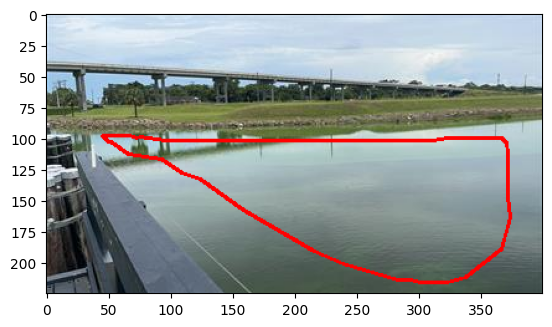

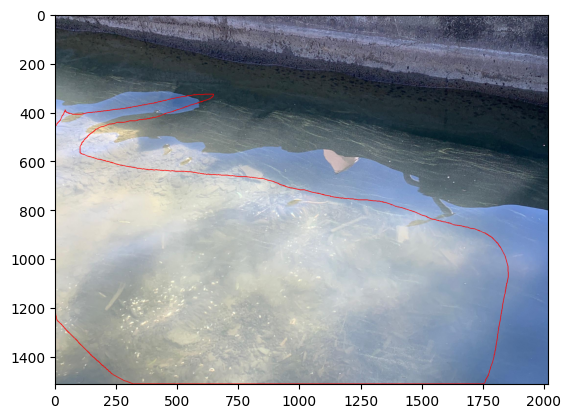

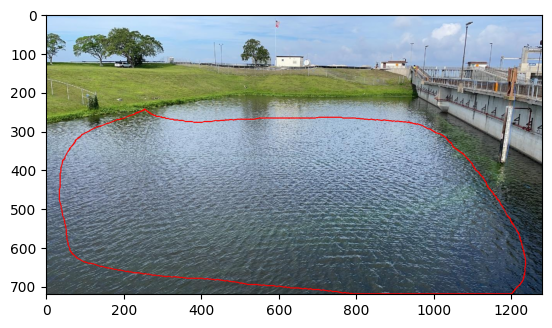

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np



# Create a function to visualize an image and its segmentation
def visualize_image(image_id, coco_data):
    # Extract image metadata
    image_meta = next(img for img in coco_data['images'] if img['id'] == image_id)
    
    # Load image using OpenCV
    image_path = coco_data['info']['image_root'] / image_meta['file_name']
    img = cv2.imread(str(image_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Extract associated annotations
    annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] == image_id]
    
    for ann in annotations:
        segmentation = np.array(ann['segmentation'][0], np.int32).reshape(-1, 1, 2)
        # Draw segmentation on the image
        cv2.polylines(img, [segmentation], isClosed=True, color=(255, 0, 0), thickness=2)
    
    # Display using matplotlib
    plt.imshow(img)
    plt.show()

# Visualize images with ids 0, 1, and 2
for img_id in [0, 1, 2]:
    visualize_image(img_id, coco_labels)
